In [1]:
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
novels = pd.read_csv("novels_0.1.4.csv", index_col="id")
novels.genres = novels.genres.apply(ast.literal_eval)
novels.tags = novels.tags.apply(ast.literal_eval)

In [3]:
novels.columns

Index(['name', 'assoc_names', 'original_language', 'authors', 'genres', 'tags',
       'start_year', 'licensed', 'original_publisher', 'english_publisher',
       'complete_original', 'chapters_original_current', 'complete_translated',
       'release_freq', 'activity_week_rank', 'activity_month_rank',
       'activity_all_time_rank', 'on_reading_lists', 'reading_list_month_rank',
       'reading_list_all_time_rank', 'rating', 'rating_votes',
       'related_series_ids', 'recommended_series_ids',
       'recommendation_list_ids', 'chapter_latest_translated'],
      dtype='object')

In [4]:
novels

,name,assoc_names,original_language,authors,genres,tags,start_year,licensed,original_publisher,english_publisher,...,activity_all_time_rank,on_reading_lists,reading_list_month_rank,reading_list_all_time_rank,rating,rating_votes,related_series_ids,recommended_series_ids,recommendation_list_ids,chapter_latest_translated
id,,,,,,,,,,,,,,,,,,,,,
5,Coiling Dragon,"['Bàn Long', 'CD', 'Pan Long', '盘龙']",chinese,"['i eat tomatoes', 'wo chi xi hong shi', '我吃西红柿']","[action, adventure, fantasy, seinen, xuanhuan]","[academy, adapted to anime, adapted to manhua,...",2008,True,qidian,wuxiaworld,...,969,13435,22081,118,4.5,1893,[38],"[195, 38, 14, 15, 4052, 791]","[94336, 93781, 93743, 92934, 92891]",NaN
65541,The Curse of Desire,['（快穿）欲之咒'],chinese,"['chaste shirt', 'qingshan', '清衫']","[comedy, gender bender, psychological, romance...","[adultery, beautiful female lead, clumsy love ...",2020,NaN,po18,NaN,...,9882,690,13250,9544,3.3,21,NaN,"[46511, 61629, 68402, 67834, 69070]","[93562, 68310, 17662]",c103
65543,Anata no Koto ga Sukina Watashi wo Oshite Kure...,['Anata no Koto ga Sukina Watashi wo Oshite Ku...,japanese,"['ebisu seiji', '恵比須 清司']","[comedy, harem, romance, school life, shounen,...","[beautiful female lead, celebrities, childhood...",2023,False,fujimi fantasia bunko,NaN,...,11772,439,4575,12187,3.0,22,NaN,"[46332, 67421]","[87891, 85936, 83021]",v1 epilogue
10,Martial God Asura,"['MGA', 'Shura Valkyrie', 'Tu La Vu Than', 'Tu...",chinese,"['kindhearted bee', 'shan liang de mi feng', '...","[action, adventure, drama, harem, mature, xuan...","[absent parents, adapted to anime, adapted to ...",2013,True,17k,wuxiaworld,...,14,15167,108,77,3.3,2070,[3619],"[14, 2072, 840, 179, 791, 16]","[91449, 91371, 91224, 89159, 86780]",c20
65547,The Seed Thief,['씨앗 도둑'],korean,['백설홍'],"[adult, comedy, fantasy, romance, smut]","[abandoned children, clingy lover, c*nnilingus...",2022,False,ridibooks,NaN,...,9723,589,6973,10462,4.0,33,NaN,"[51446, 49277, 74144]","[90048, 80475, 76902, 75633, 75458]",v2c6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65524,How to Fix Your Progamer,"['Progamer Rewrite', '프고쓰', '프로게이머 고쳐쓰기']",korean,['킬금'],"[drama, romance, shounen ai, sports]","[cold protagonist, comedic undertone, e-sports...",2023,False,nile,NaN,...,18194,260,20152,15319,3.8,13,NaN,NaN,"[93392, 80286, 77261]",NaN
65529,I’ve Never Seen a Lucky Player!,['幸运亿的玩家，没见过吧'],chinese,['临渊不羡鱼_'],"[action, adult, comedy, supernatural]","[beautiful female lead, calm protagonist, cond...",NaN,NaN,NaN,NaN,...,16338,161,14908,17863,4.0,14,NaN,NaN,[89136],c10
65531,My Childhood Friend Attacked Me When I Declare...,['My Childhood Friend Attacked Me When I Told ...,japanese,['まんぷく犬'],"[comedy, ecchi, romance, school life]","[childhood friends, first-time interc**rse, lo...",2023,False,kakuyomu,NaN,...,9728,366,11998,13335,3.0,28,NaN,NaN,[43969],c19


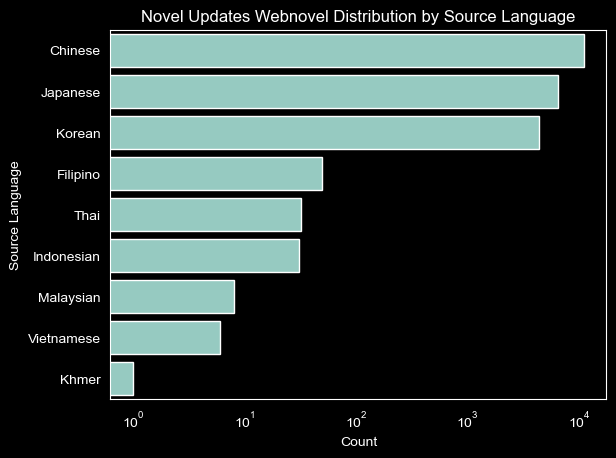

In [5]:
sns.set_style("dark")
sns.color_palette("tab10")
plt.style.use("dark_background")
ax = sns.countplot(novels.original_language,
                   order=novels.original_language.value_counts(ascending=False).index,
                   formatter=lambda l: l[0].upper() + l[1:])
ax.set_title("Novel Updates Webnovel Distribution by Source Language")
ax.set_ylabel("Source Language")
ax.set_xscale("log")
ax.set_xlabel("Count")
plt.savefig("source-language.png")
plt.show()

In [6]:
novel_genres = novels.explode("genres")
max_lang = novel_genres.groupby("genres").original_language.value_counts().idxmax()[1]
genres_pivot = novel_genres.pivot_table(columns="original_language", index="genres", aggfunc="size", fill_value=0)
genres_pivot = genres_pivot.div(genres_pivot.sum(axis=1), axis=0)
genres_order = genres_pivot[max_lang].sort_values(ascending=False).index

novel_genres.genres = pd.Categorical(novel_genres.genres, genres_order)

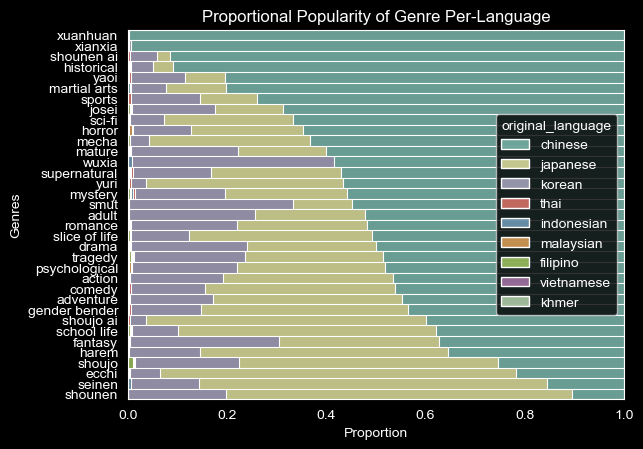

In [7]:
sns.set_style("dark")
sns.color_palette("tab10")
plt.style.use("dark_background")
ax = sns.histplot(
    data=novel_genres,
    y="genres",
    hue="original_language",
    multiple="fill",
    discrete=True,
    legend=True,
)
ax.set_title("Proportional Popularity of Genre Per-Language")
ax.set_ylabel("Genres")
ax.set_xlabel("Proportion")
plt.savefig("proportioanl-popularity.png")
plt.show()

In [8]:
novel_genres = novels.explode("genres")
max_lang = novel_genres.groupby("genres").original_language.value_counts().idxmax()[1]
genres_pivot = novel_genres.pivot_table(columns="original_language", index="genres", aggfunc="size", fill_value=0)
genres_pivot = genres_pivot.div(genres_pivot.sum(axis=0), axis=1)
genres_pivot = genres_pivot.div(genres_pivot.sum(axis=1), axis=0)
genres_order = genres_pivot[max_lang].sort_values(ascending=False).index

relative_genres = genres_pivot.melt(ignore_index=False).reset_index()
relative_genres.genres = pd.Categorical(relative_genres.genres, genres_order)

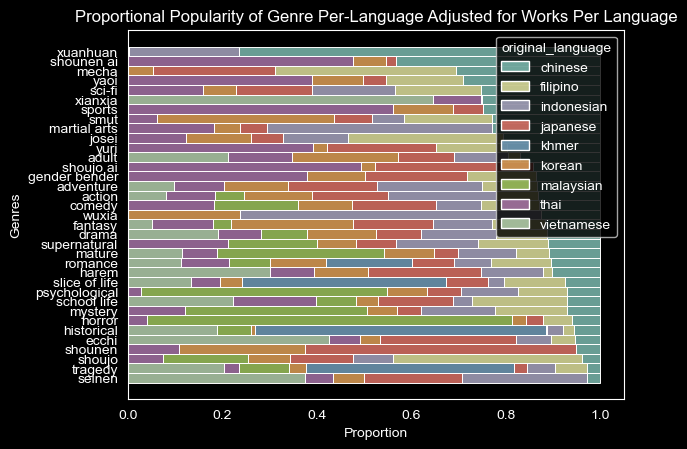

In [9]:
sns.set_style("dark")
sns.color_palette("tab10")
plt.style.use("dark_background")
ax = sns.histplot(
    data=relative_genres,
    y="genres",
    hue="original_language",
    weights="value",
    multiple="stack",
)
ax.set_title("Proportional Popularity of Genre Per-Language Adjusted for Works Per Language")
ax.set_ylabel("Genres")
ax.set_xlabel("Proportion")
plt.savefig("proportional-popularity-adj.png")
plt.show()

In [10]:
novel_tags = novels.explode("tags")
tags = novel_tags.tags.value_counts(ascending=True).index.values.astype(str)
smut_tags = tags[np.strings.find(tags, '*') != -1]
smut_tags

array(['s*ave protagonist', 's*ave harem', 'or*y', 'prostit**es',
       's*xual cultivation technique', 'f**anari', 's*x s*aves',
       's*x friends', 'reverse r*pe', 'outdoor interc**rse',
       'm*sturbation', 'an*l', 'h*ndjob', 'c*nnilingus', 's*xual abuse',
       'pe*verted protagonist', 'r*pe victim becomes lover', 'f*llatio',
       's*aves', 'r*pe', 'first-time interc**rse'], dtype='<U36')

In [11]:
print(novel_tags.tags.value_counts(ascending=False).to_string())

tags
male protagonist                        8281
female protagonist                      7537
handsome male lead                      7159
beautiful female lead                   6539
modern day                              5801
transmigration                          4303
love interest falls in love first       4291
nobles                                  2989
magic                                   2925
calm protagonist                        2871
strong love interests                   2779
royalty                                 2732
fantasy world                           2582
misunderstandings                       2552
devoted love interests                  2466
european ambience                       2433
clever protagonist                      2386
reincarnation                           2319
weak to strong                          2302
aristocracy                             2288
doting love interests                   2268
wealthy characters                      2109
hard-

In [12]:
 novel_tags.tags[novel_tags.tags.isin(smut_tags)].value_counts()

tags
first-time interc**rse          1854
r*pe                            1448
s*aves                           563
f*llatio                         562
r*pe victim becomes lover        519
pe*verted protagonist            409
s*xual abuse                     407
c*nnilingus                      362
h*ndjob                          282
an*l                             261
m*sturbation                     245
outdoor interc**rse              208
reverse r*pe                     190
s*x friends                      184
s*x s*aves                       157
s*xual cultivation technique     133
f**anari                         133
prostit**es                      125
or*y                             102
s*ave harem                       85
s*ave protagonist                 79
Name: count, dtype: int64

In [13]:
least_popular_smut_tag_count = novel_tags.tags[novel_tags.tags.isin(smut_tags)].value_counts().min()
tag_counts = novel_tags.tags.value_counts(ascending=True)
tags_less_popular_than_any_smut_tag = tag_counts[tag_counts < least_popular_smut_tag_count]
print(len(tags))
print(len(tags_less_popular_than_any_smut_tag))
print(tags_less_popular_than_any_smut_tag.to_string())

769
177
tags
misandry                         2
imaginary friend                 3
grave keepers                    5
sign language                    6
jsdf                             6
adapted from manhua              7
waiters                          7
genies                           7
jobless class                    8
gladiators                      11
based on a visual novel         12
seven virtues                   12
editors                         12
amusement park                  13
shield user                     13
genderless protagonist          13
jiangshi                        13
based on a tv show              13
invisibility                    14
valkyries                       14
classic                         14
shikigami                       15
mangaka                         15
forgetful protagonist           15
sculptors                       15
body-double                     16
elderly protagonist             17
druids                          18
cryosta

In [14]:
novel_tags = novels.explode("tags").reset_index()
novel_tags.pivot_table(columns="original_language", index="tags", aggfunc="size", fill_value=0)

novel_tags

,id,name,assoc_names,original_language,authors,genres,tags,start_year,licensed,original_publisher,...,activity_all_time_rank,on_reading_lists,reading_list_month_rank,reading_list_all_time_rank,rating,rating_votes,related_series_ids,recommended_series_ids,recommendation_list_ids,chapter_latest_translated
0,5,Coiling Dragon,"['Bàn Long', 'CD', 'Pan Long', '盘龙']",chinese,"['i eat tomatoes', 'wo chi xi hong shi', '我吃西红柿']","[action, adventure, fantasy, seinen, xuanhuan]",academy,2008,True,qidian,...,969,13435,22081,118,4.5,1893,[38],"[195, 38, 14, 15, 4052, 791]","[94336, 93781, 93743, 92934, 92891]",NaN
1,5,Coiling Dragon,"['Bàn Long', 'CD', 'Pan Long', '盘龙']",chinese,"['i eat tomatoes', 'wo chi xi hong shi', '我吃西红柿']","[action, adventure, fantasy, seinen, xuanhuan]",adapted to anime,2008,True,qidian,...,969,13435,22081,118,4.5,1893,[38],"[195, 38, 14, 15, 4052, 791]","[94336, 93781, 93743, 92934, 92891]",NaN
2,5,Coiling Dragon,"['Bàn Long', 'CD', 'Pan Long', '盘龙']",chinese,"['i eat tomatoes', 'wo chi xi hong shi', '我吃西红柿']","[action, adventure, fantasy, seinen, xuanhuan]",adapted to manhua,2008,True,qidian,...,969,13435,22081,118,4.5,1893,[38],"[195, 38, 14, 15, 4052, 791]","[94336, 93781, 93743, 92934, 92891]",NaN
3,5,Coiling Dragon,"['Bàn Long', 'CD', 'Pan Long', '盘龙']",chinese,"['i eat tomatoes', 'wo chi xi hong shi', '我吃西红柿']","[action, adventure, fantasy, seinen, xuanhuan]",alchemy,2008,True,qidian,...,969,13435,22081,118,4.5,1893,[38],"[195, 38, 14, 15, 4052, 791]","[94336, 93781, 93743, 92934, 92891]",NaN
4,5,Coiling Dragon,"['Bàn Long', 'CD', 'Pan Long', '盘龙']",chinese,"['i eat tomatoes', 'wo chi xi hong shi', '我吃西红柿']","[action, adventure, fantasy, seinen, xuanhuan]",angels,2008,True,qidian,...,969,13435,22081,118,4.5,1893,[38],"[195, 38, 14, 15, 4052, 791]","[94336, 93781, 93743, 92934, 92891]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346994,65532,Classmate’s Engagement,['同学婚约'],chinese,['几京'],"[romance, yaoi]",NaN,2021,NaN,jjwxc,...,14905,392,18927,12933,4.3,15,NaN,NaN,"[85510, 81075, 76512, 76111, 74329]",c16
346995,65535,"My Sister Told Me to Die, so I Wrote My Sui**d...",['妹に「死ね」と言われたので遺書を書いた。'],japanese,['バネ屋'],[drama],aggressive characters,2021,False,kakuyomu,...,11529,189,17201,17054,3.2,34,NaN,NaN,[55213],oneshot
346996,65535,"My Sister Told Me to Die, so I Wrote My Sui**d...",['妹に「死ね」と言われたので遺書を書いた。'],japanese,['バネ屋'],[drama],male protagonist,2021,False,kakuyomu,...,11529,189,17201,17054,3.2,34,NaN,NaN,[55213],oneshot
346997,65535,"My Sister Told Me to Die, so I Wrote My Sui**d...",['妹に「死ね」と言われたので遺書を書いた。'],japanese,['バネ屋'],[drama],oneshot,2021,False,kakuyomu,...,11529,189,17201,17054,3.2,34,NaN,NaN,[55213],oneshot


In [15]:
novels.columns

Index(['name', 'assoc_names', 'original_language', 'authors', 'genres', 'tags',
       'start_year', 'licensed', 'original_publisher', 'english_publisher',
       'complete_original', 'chapters_original_current', 'complete_translated',
       'release_freq', 'activity_week_rank', 'activity_month_rank',
       'activity_all_time_rank', 'on_reading_lists', 'reading_list_month_rank',
       'reading_list_all_time_rank', 'rating', 'rating_votes',
       'related_series_ids', 'recommended_series_ids',
       'recommendation_list_ids', 'chapter_latest_translated'],
      dtype='object')

In [16]:
novels[novels.complete_original == True & novels.complete_translated.isna() & ~novels.chapter_latest_translated.isna()]

,name,assoc_names,original_language,authors,genres,tags,start_year,licensed,original_publisher,english_publisher,...,activity_all_time_rank,on_reading_lists,reading_list_month_rank,reading_list_all_time_rank,rating,rating_votes,related_series_ids,recommended_series_ids,recommendation_list_ids,chapter_latest_translated
id,,,,,,,,,,,,,,,,,,,,,
65543,Anata no Koto ga Sukina Watashi wo Oshite Kure...,['Anata no Koto ga Sukina Watashi wo Oshite Ku...,japanese,"['ebisu seiji', '恵比須 清司']","[comedy, harem, romance, school life, shounen,...","[beautiful female lead, celebrities, childhood...",2023,False,fujimi fantasia bunko,NaN,...,11772,439,4575,12187,3.0,22,NaN,"[46332, 67421]","[87891, 85936, 83021]",v1 epilogue
10,Martial God Asura,"['MGA', 'Shura Valkyrie', 'Tu La Vu Than', 'Tu...",chinese,"['kindhearted bee', 'shan liang de mi feng', '...","[action, adventure, drama, harem, mature, xuan...","[absent parents, adapted to anime, adapted to ...",2013,True,17k,wuxiaworld,...,14,15167,108,77,3.3,2070,[3619],"[14, 2072, 840, 179, 791, 16]","[91449, 91371, 91224, 89159, 86780]",c20
14,Against the Gods,"['ATG', 'Evil God', 'Heaven-Defying Evil God',...",chinese,"['mars gravity', '火星引力']","[action, adventure, ecchi, fantasy, harem, mar...","[adapted to anime, adapted to manhua, arranged...",2014,True,zongheng,wuxiaworld,...,4,22385,5825,20,3.9,3612,NaN,"[10, 2072, 179, 791, 4010, 6363]","[91804, 91371, 91224, 89159, 88933]",c50
15,I Shall Seal the Heavens,"['Cennetleri Mühürlemeliyim', 'Demon Sealer', ...",chinese,"['er gen', '耳根']","[action, adventure, drama, xianxia]","[abandoned children, adapted to manhua, age re...",2014,True,qidian,wuxiaworld,...,9,19753,261,33,4.4,3165,"[181, 2074, 3562, 5844, 22160, 55818]","[5844, 2689, 181, 631, 195, 5]","[94336, 93781, 92847, 92041, 91756]",c100
16,Battle Through the Heavens,"['Battles Breaks the Skies', 'BTTH', 'Fighting...",chinese,"['heavenly silkworm potato', 'tian can tu dou'...","[action, adventure, fantasy, harem, xuanhuan]","[adapted to anime, adapted to drama, adapted t...",2009,True,qidian,wuxiaworld,...,106,12168,56,179,3.8,1271,"[840, 847, 6147, 18263, 46542, 65554]","[840, 847, 5, 14, 9421, 3952]","[94336, 92847, 91564, 91449, 89233]",c50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65489,Cognitive Bias,['认知性偏差'],chinese,"['shu xi', '蜀夕']","[romance, school life, smut]","[childhood friends, different social status, f...",2022,NaN,NaN,NaN,...,17021,168,16432,17651,3.9,8,NaN,NaN,NaN,c7
65491,Seducing the Phoenix Man Husband (1v1),['勾引凤凰男老公(1v1)'],chinese,['箬零'],"[adult, drama, fantasy, mature, romance, slice...","[affair, beautiful female lead, college/univer...",NaN,NaN,NaN,NaN,...,17638,287,13298,14732,4.0,7,NaN,NaN,[67712],c10
65513,A Story About Becoming a Houseplant and Watchi...,['観葉植物になって百合カップルのイチャラブ生活を見守るお話'],japanese,"['mikami teren', 'みかみてれん']","[ecchi, romance, shoujo ai, slice of life, yuri]","[age progression, beautiful female lead, child...",2017,False,mikami teren bunko,NaN,...,15326,252,11058,15507,4.0,23,NaN,NaN,"[91247, 90152, 89287, 84444, 75176]",v1 afterword


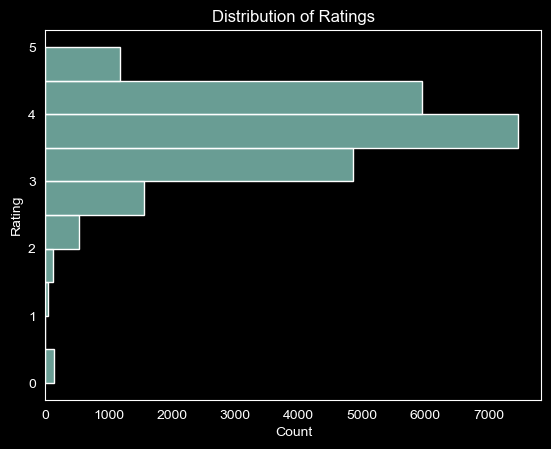

In [17]:
ax = sns.histplot(y=novels.rating, bins=10)
ax.set_title("Distribution of Ratings")
ax.set_ylabel("Rating")
plt.savefig("ratings-distribution.png")
plt.show()

/tmp/ipykernel_8602/254181710.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


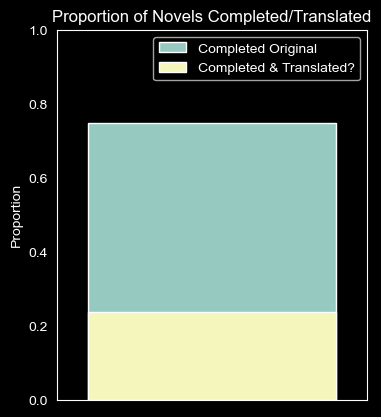

In [18]:
means = novels.loc[:, ["complete_original", "complete_translated"]].astype(bool).fillna(True).mean()
f, ax = plt.subplots(figsize=(4.0, 4.8))
ax.set_ylim([0.0, 1.0])
ax.set_title("Proportion of Novels Completed/Translated")
ax.set_ylabel("Proportion")
ax.legend()
sns.barplot(y=means.loc[["complete_original"]], label="Completed Original")
sns.barplot(y=means.loc[["complete_translated"]], label="Completed & Translated?")
plt.savefig("completed-translated.png")
plt.show()

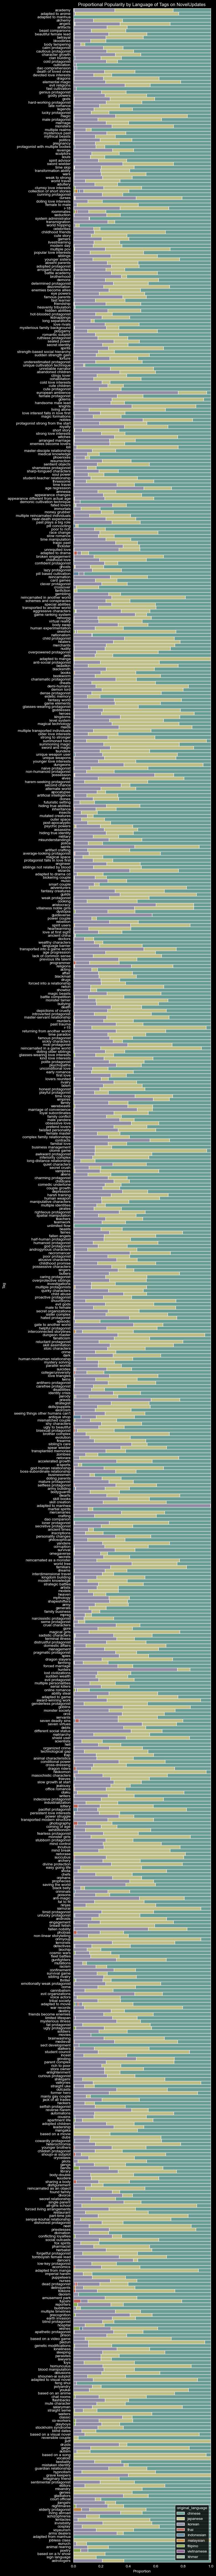

In [35]:
sns.set_style("dark")
sns.color_palette("tab10")
plt.style.use("dark_background")
f, ax = plt.subplots(figsize=(6.4, 120.0))
ax = sns.histplot(
    ax=ax,
    data=novel_tags[~novel_tags.tags.isin(smut_tags)],
    y="tags",
    hue="original_language",
    multiple="fill",
    discrete=True,
    legend=True,
)
ax.set_title("Proportional Popularity by Language of Tags on NovelUpdates")
ax.set_ylabel("Tag")
ax.set_xlabel("Proportion")
plt.savefig("tags-proportional-popularity-lang-all.png")
plt.show()

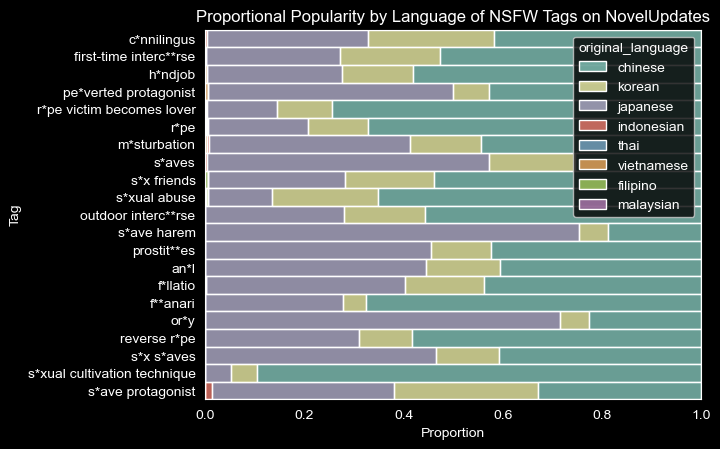

In [20]:
sns.set_style("dark")
sns.color_palette("tab10")
plt.style.use("dark_background")
ax = sns.histplot(
    data=novel_tags[novel_tags.tags.isin(smut_tags)],
    y="tags",
    hue="original_language",
    multiple="fill",
    discrete=True,
    legend=True,
)
ax.set_title("Proportional Popularity by Language of NSFW Tags on NovelUpdates")
ax.set_ylabel("Tag")
ax.set_xlabel("Proportion")
#plt.savefig("tags-proportional-popularity-lang.png")
plt.show()

In [21]:
safeish_tags = novel_tags[~novel_tags.tags.isin(smut_tags)]
tag_k = 30
top_k_tags = safeish_tags.tags.value_counts().nlargest(n=tag_k).index
top_k_tags_df = safeish_tags[safeish_tags.tags.isin(top_k_tags)].copy()
top_k_tags_df.tags = pd.Categorical(top_k_tags_df.tags, top_k_tags)

In [22]:
safeish_tags.tags.value_counts()

tags
male protagonist         8281
female protagonist       7537
handsome male lead       7159
beautiful female lead    6539
modern day               5801
                         ... 
jsdf                        6
sign language               6
grave keepers               5
imaginary friend            3
misandry                    2
Name: count, Length: 748, dtype: int64

In [23]:
pd.crosstab(safeish_tags.tags, safeish_tags.original_language)

original_language,chinese,filipino,indonesian,japanese,khmer,korean,malaysian,thai,vietnamese
tags,,,,,,,,,
abandoned children,218,0,0,141,0,183,0,0,0
ability steal,70,0,0,64,0,46,0,1,0
absent parents,293,2,2,124,0,132,0,0,0
abusive characters,419,1,1,116,0,243,1,1,0
academy,278,2,0,432,0,300,0,3,0
...,...,...,...,...,...,...,...,...,...
youkai,7,0,0,31,0,5,0,0,0
younger brothers,59,0,0,31,0,34,0,1,0
younger love interests,477,1,1,237,0,156,0,1,0


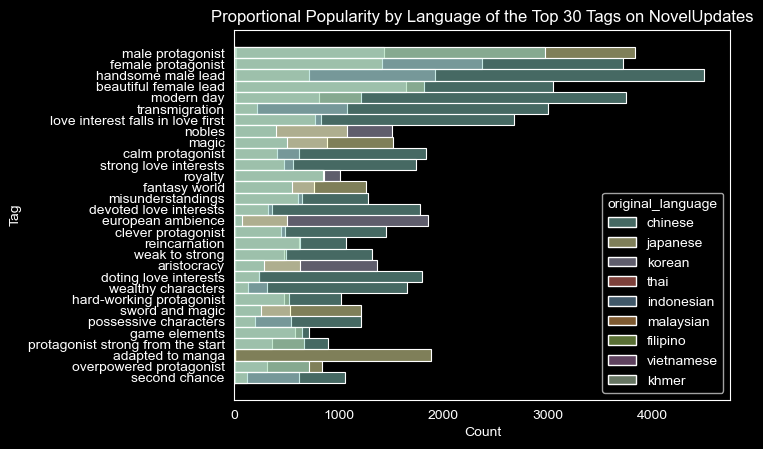

In [34]:
sns.set_style("dark")
sns.color_palette("tab10")
plt.style.use("dark_background")
ax = sns.histplot(
    data=top_k_tags_df,
    y="tags",
    hue="original_language",
    #multiple="fill",
    discrete=True,
    legend=True,
)
ax.set_title(f"Proportional Popularity by Language of the Top {tag_k} Tags on NovelUpdates")
ax.set_ylabel("Tag")
ax.set_xlabel("Count")
ax.set_xlim(0, 4750)
plt.savefig("tags-proportional-popularity-lang.png")
plt.show()